In [8]:
import numpy as np
import math
from qutip import create, basis, sigmaz, sigmax, sigmay
import matplotlib.pyplot as plt
import pandas as pd
from Please_Graduate import quantum_system, Model

omega_r = 2*np.pi*0.80
kai = -2*np.pi*0.18

quantum_system = quantum_system(omega_r=omega_r, kai=kai, qubit_initial=0, cavity_initial=1, superposition=True)

In [9]:
df = quantum_system.monte_carlo(n=100, n_sample=100, t_i=0, t_f=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.000000,0.0,0.0,0.46,0.00,0.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010101,0.0,0.0,0.42,0.17,0.33,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.020202,0.0,0.0,0.11,0.32,0.40,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.030303,0.0,0.0,0.02,0.40,0.25,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.040404,0.0,0.0,0.21,0.35,0.06,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.959596,0.0,0.0,0.24,0.28,0.37,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.969697,0.0,0.0,0.03,0.46,0.49,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.979798,0.0,0.0,0.11,0.36,0.52,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.989899,0.0,0.0,0.45,0.16,0.32,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_feature, train_label, test_feature, test_label = quantum_system.preprocess(df, split_ratio=0.75,time_step=10)

In [11]:
Model = Model(df, train_feature, train_label, test_feature, test_label)
model = Model.LSTM()

Epoch 1/100
1/1 [==============================] - 0s 98ms/step - loss: 2.2527 - binary_crossentropy: 2.2527 - val_loss: 2.1583 - val_binary_crossentropy: 2.1583
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 2.2506 - binary_crossentropy: 2.2506 - val_loss: 2.1577 - val_binary_crossentropy: 2.1577
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 2.2503 - binary_crossentropy: 2.2503 - val_loss: 2.1571 - val_binary_crossentropy: 2.1571
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 2.2494 - binary_crossentropy: 2.2494 - val_loss: 2.1566 - val_binary_crossentropy: 2.1566
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 2.2331 - binary_crossentropy: 2.2331 - val_loss: 2.1560 - val_binary_crossentropy: 2.1560
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 2.2417 - binary_crossentropy: 2.2417 - val_loss: 2.0657 - val_binary_crossentropy: 2.0657
Epoch 7/100
1/1 [===========

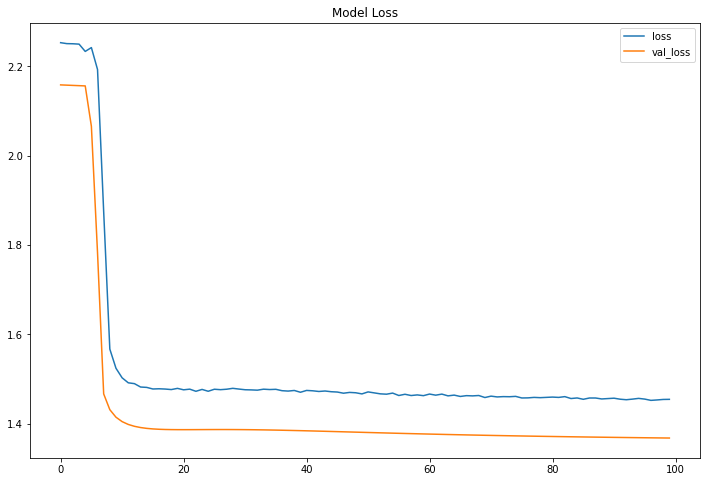

In [13]:
model, history = Model.fit(model,epochs=100, batch_size = 128, show_loss = True)

rmse: 0.23218466423850784
r2: -0.9385464754889452


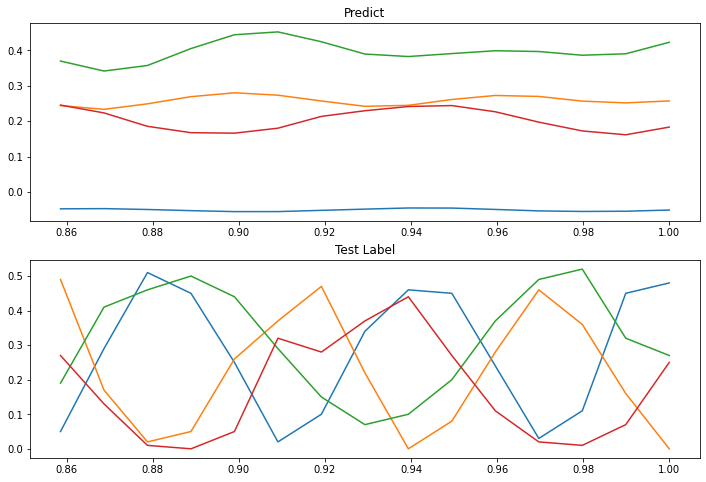

In [14]:
Model.predict(model,show_plot=True)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional

model = Sequential()
model.add(LSTM(256,activation='tanh',input_shape=(train_feature.shape[1],train_feature.shape[2]), dropout=0.2))
#model.add(Dropout(0.2))
model.add(Dense(train_feature.shape[2], activation='linear'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=[tf.keras.metrics.BinaryCrossentropy()])

In [22]:
model = Sequential()
model.add(Bidirectional(LSTM(256,activation='tanh',input_shape=(train_feature.shape[1],train_feature.shape[2]), dropout=0.2)))
#model.add(Dropout(0.2))
model.add(Dense(train_feature.shape[2], activation='linear'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=[tf.keras.metrics.BinaryCrossentropy()])

In [26]:
history = model.fit(train_feature, train_label, batch_size = 128 ,epochs=100,validation_split=0.2, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 158ms/step - loss: 1.5530 - binary_crossentropy: 1.5530 - val_loss: 1.6983 - val_binary_crossentropy: 1.6983
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 1.5623 - binary_crossentropy: 1.5623 - val_loss: 1.7084 - val_binary_crossentropy: 1.7084
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 1.5657 - binary_crossentropy: 1.5657 - val_loss: 1.7162 - val_binary_crossentropy: 1.7162
Epoch 4/100
1/1 [==============================] - 0s 102ms/step - loss: 1.5771 - binary_crossentropy: 1.5771 - val_loss: 1.7209 - val_binary_crossentropy: 1.7209
Epoch 5/100
1/1 [==============================] - 0s 93ms/step - loss: 1.5825 - binary_crossentropy: 1.5825 - val_loss: 1.7222 - val_binary_crossentropy: 1.7222
Epoch 6/100
1/1 [==============================] - 0s 88ms/step - loss: 1.5827 - binary_crossentropy: 1.5827 - val_loss: 1.7204 - val_binary_crossentropy: 1.7204
Epoch 7/100
1/1 [=========

In [27]:
predict = model.predict(test_feature)

from sklearn.metrics import mean_squared_error, r2_score
print('rmse: {}'.format(np.sqrt(mean_squared_error(test_label, predict))))
print('r2: {}'.format(r2_score(test_label, predict)))

rmse: 0.14753719614093297
r2: 0.11975760760972334


In [28]:
import random, os, sys
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.keras.layers import Layer

In [29]:
class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

    
class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn
    
    
def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

def GetPadMask(q, k):
    ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
    mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
    mask = K.batch_dot(ones, mask, axes=[2,1])
    return mask

def GetSubMask(s):
    len_s = tf.shape(s)[1]
    bs = tf.shape(s)[:1]
    mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
    return mask

class CustomeLearningSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomeLearningSchedule, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        param_1 = tf.math.rsqrt(step)
        param_2 = step * (self.warmup_steps**(-1.5))
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(param_1, param_2)

Text(0.5, 0, 'Train Step')

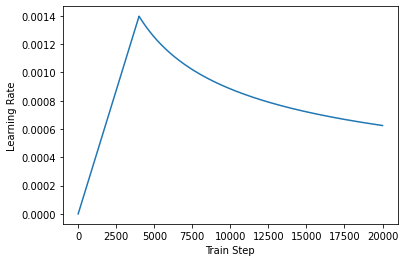

In [31]:
sample_learning_rate = CustomeLearningSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(20000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [49]:
D_MODEL=500
batch_size = 128
epochs = 10

lr = CustomeLearningSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr,beta_1=0.9,beta_2=0.98,epsilon=1e-9)

In [50]:
def build_model():
    inp = Input(shape = (train_feature.shape[1], train_feature.shape[2]))

    x = Bidirectional(LSTM(128, return_sequences=True))(inp)        
    #for i in range(2):
    x, self_attn = EncoderLayer(
            d_model=D_MODEL,
            d_inner_hid=512, 
            n_head=4, 
            d_k=64,
            d_v=64, 
            dropout=0.2)(x)
        
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(256)(conc)
    x = Dense(train_feature.shape[2])(conc)      

    model = Model(inputs = inp, outputs = x)
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),  
        optimizer = optimizer)
    
    return model

In [51]:
multi_head = build_model()
multi_head.summary()

The following Variables were used a Lambda layer's call (tf.__operators__.add_13), but
are not present in its tracked objects:
  <tf.Variable 'layer_normalization_6/beta:0' shape=(500,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.__operators__.add_15), but
are not present in its tracked objects:
  <tf.Variable 'layer_normalization_7/beta:0' shape=(500,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 10, 4)]      0                                            
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 10, 256)      136192      input_4[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 10, 256)      65536       bidirectional_9[0][0]            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 10, 256)      65536       bidirectional_9[0][0]            
____________________________________________________________________________________________

In [52]:
history = multi_head.fit(x=train_feature, 
                         y=train_label,
                         batch_size=batch_size,
                         epochs=100,
                         validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 6.7176 - val_loss: 6.6071
Epoch 2/100
1/1 [==============================] - 0s 128ms/step - loss: 6.9746 - val_loss: 6.6072
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 6.5595 - val_loss: 6.6072
Epoch 4/100
1/1 [==============================] - 0s 134ms/step - loss: 6.6457 - val_loss: 6.6073
Epoch 5/100
1/1 [==============================] - 0s 113ms/step - loss: 6.4884 - val_loss: 6.6075
Epoch 6/100
1/1 [==============================] - 0s 113ms/step - loss: 6.3319 - val_loss: 6.6080
Epoch 7/100
1/1 [==============================] - 0s 96ms/step - loss: 6.2981 - val_loss: 6.6088
Epoch 8/100
1/1 [==============================] - 0s 103ms/step - loss: 6.2162 - val_loss: 6.6104
Epoch 9/100
1/1 [==============================] - 0s 98ms/step - loss: 6.5584 - val_loss: 6.6138
Epoch 10/100
1/1 [==============================] - 0s 96ms/step - loss: 6.4063 - val_loss: 6.6344
Epoch 11/100
1/

In [53]:
predict = multi_head.predict(test_feature)

from sklearn.metrics import mean_squared_error, r2_score
print('rmse: {}'.format(np.sqrt(mean_squared_error(test_label, predict))))
print('r2: {}'.format(r2_score(test_label, predict)))

rmse: 1.126013836036842
r2: -44.16773625283803
